<a href="https://colab.research.google.com/github/asyahdin/Introduction-to-Python/blob/main/Project_FuelConsumption_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-25 03:49:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2024-07-25 03:49:25 (2.82 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")

df.head(200)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2014,CHEVROLET,CORVETTE,TWO-SEATER,6.2,8,AS6,Z,14.9,8.5,12.0,24,276
196,2014,CHEVROLET,CORVETTE,TWO-SEATER,6.2,8,M7,Z,13.7,8.2,11.2,25,258
197,2014,CHEVROLET,CRUZE,MID-SIZE,1.4,4,AS6,X,9.1,6.3,7.8,36,179
198,2014,CHEVROLET,CRUZE,MID-SIZE,1.4,4,M6,X,9.1,6.3,7.8,36,179


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [ ]:
df['CO2EMISSIONS'].value_counts()

CO2EMISSIONS
294    25
230    22
225    21
209    20
196    19
       ..
195     1
437     1
213     1
370     1
124     1
Name: count, Length: 159, dtype: int64

In [ ]:
X = df.iloc[:, :-1]

X.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27


In [ ]:
y = df['CO2EMISSIONS']

In [ ]:
x = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG']]

In [ ]:
x.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG
0,2.0,4,8.5,9.9,6.7,33
1,2.4,4,9.6,11.2,7.7,29
2,1.5,4,5.9,6.0,5.8,48
3,3.5,6,11.1,12.7,9.1,25
4,3.5,6,10.6,12.1,8.7,27


In [ ]:
x = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG']].values
y = df['CO2EMISSIONS'].values

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler

#standardize features in datasets
scaler = StandardScaler()

x = scaler.fit_transform(x)

x[:5]

array([[-0.9512918 , -0.99896853, -0.88430407, -0.82855772, -0.99334135,
         0.87855306],
       [-0.66865251, -0.99896853, -0.5685715 , -0.5114328 , -0.63532912,
         0.34273362],
       [-1.30459092, -0.99896853, -1.63058106, -1.77993246, -1.31555236,
         2.88787597],
       [ 0.10860554,  0.11424235, -0.13802708, -0.14551944, -0.13411199,
        -0.19308583],
       [ 0.10860554,  0.11424235, -0.28154188, -0.29188478, -0.27731688,
         0.0748239 ]])

# Train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

X_train.shape

(800, 12)

# Fit, predict, evaluate

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, jaccard_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier
DS = DecisionTreeClassifier()

# Training the classifier
DS.fit(X_train, y_train)

# Prediction
y_hat = DS.predict(X_test)

# Evaluation
print('The accuracy score is:', accuracy_score(y_test, y_hat))
print('')

print('The confusion matrix is:')
print(confusion_matrix(y_test, y_hat))
print('')

print('The Jaccard score is:', jaccard_score(y_test, y_hat, average='binary'))  # for binary classification

# If you have a multiclass problem, you can use 'average='micro''
# print('The Jaccard score is:', jaccard_score(y_test, y_hat, average='micro'))


The accuracy score is: 0.8533333333333334

The confusion matrix is:
[[129  16]
 [ 28 127]]

The Jaccard score is: 0.7426900584795322


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

DS = DecisionTreeClassifier()

#training #fit
X_train.shape
y_train.shape
DS.fit(X_train, y_train)

#predicition
y_hat = DS.predict(X_test)

#evaluation
print('The accuracy score is: ', accuracy_score(y_test, y_hat))
print('')
print ('The CM is: ', confusion_matrix(y_test, y_hat))
print('')
print ('The jaccard score is: ', jaccard_score(y_test, y_hat, average='micro')) #more than 2 can calc results


The accuracy score is:  0.85

The CM is:  [[126  19]
 [ 26 129]]

The jaccard score is:  0.7391304347826086


**Data Modeling - SVM**

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: >

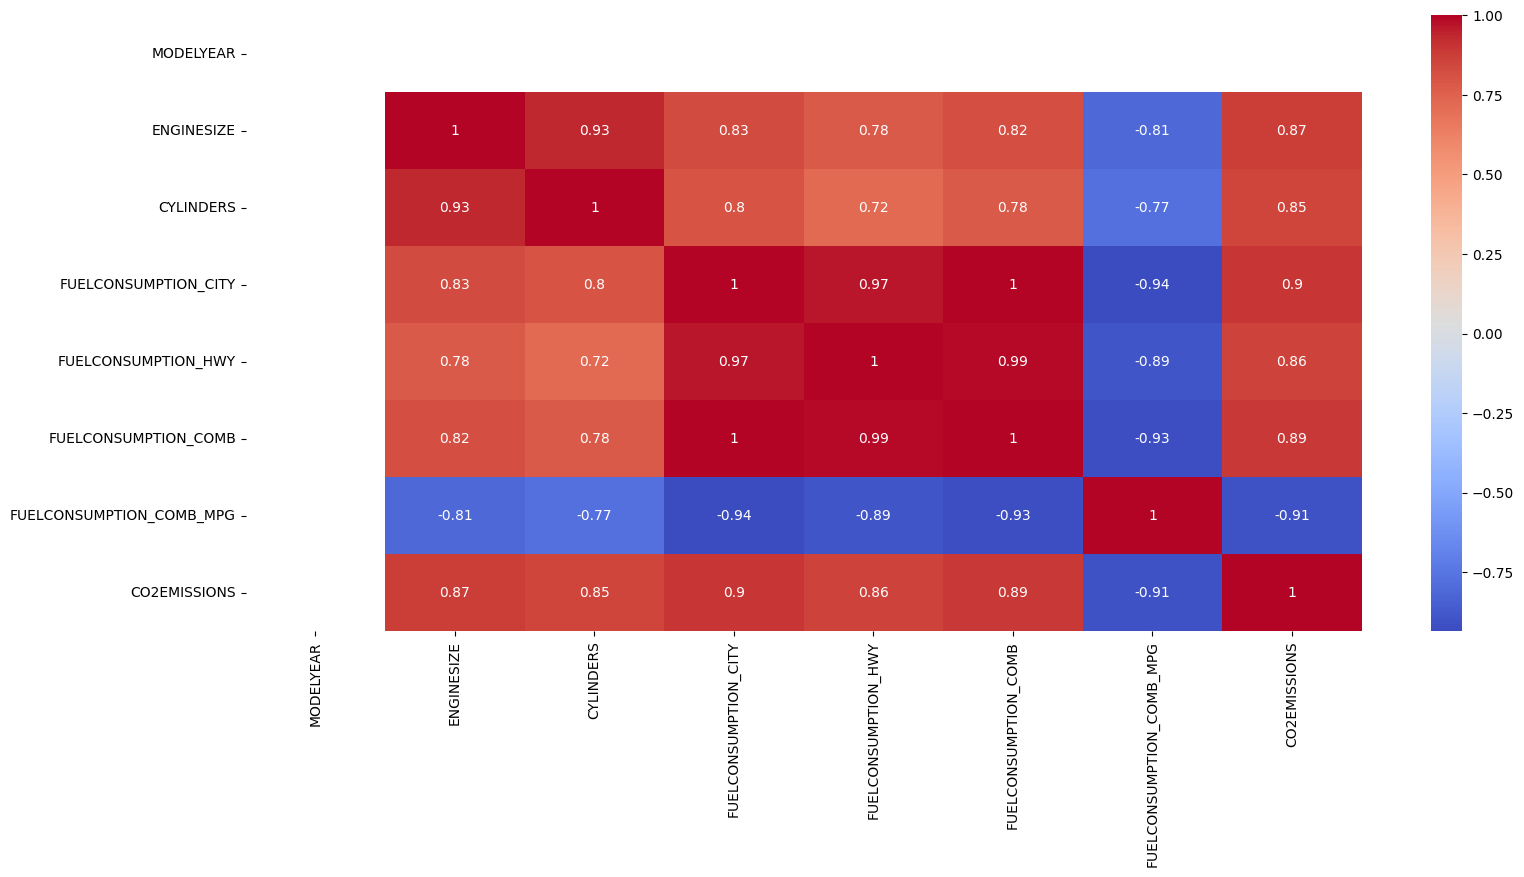

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

In [ ]:
#to see the balance of the value
#issues is credit card to see balance

df['CO2EMISSIONS'].value_counts()

CO2EMISSIONS
294    25
230    22
225    21
209    20
196    19
       ..
195     1
437     1
213     1
370     1
124     1
Name: count, Length: 159, dtype: int64

In [ ]:
x = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG']].values
y = df['CO2EMISSIONS'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train.shape

(853, 6)

In [ ]:
#modeling
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM_bank = SVC()

#training
SVM_bank.fit(x_train, y_train)

#prediction
y_hat= SVM_bank.predict(x_test)

#evaluation
print('The accuracy based on RBD kernal is: ', (accuracy_score(y_test, y_hat))*100)

In [ ]:
SVM_bank = SVC(kernel='linear') # so if not change the parameters the default kernel is rbf!! #The result must have higher than rbf #processing time is faster than rbf

#training
SVM_bank.fit(x_train, y_train)

#prediction
y_hat= SVM_bank.predict(x_test)

#evaluation
print('The accuracy based on RBD kernal is: ', (accuracy_score(y_test, y_hat))*100)

In [ ]:
SVM_bank = SVC(kernel='poly') #using parameter poly #The result is same with rbf

#training
SVM_bank.fit(x_train, y_train)

#prediction
y_hat= SVM_bank.predict(x_test)

#evaluation
print('The accuracy based on RBD kernal is: ', (accuracy_score(y_test, y_hat))*100)

In [ ]:
SVM_bank = SVC(kernel='sigmoid') #using parameter poly #The result is lowest among other kernel

#training
SVM_bank.fit(x_train, y_train)

#prediction
y_hat= SVM_bank.predict(x_test)

#evaluation
print('The accuracy based on RBD kernal is: ', (accuracy_score(y_test, y_hat))*100)